In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st

In [2]:
caliperS = pd.read_csv('caliperSmall.csv')
caliperM = pd.read_csv('caliperMedium.csv')
caliperL = pd.read_csv('caliperXLargex.csv')
caliperL

,Name,Succ,Fail,SendRate(TPS),MaxLatency(s),MinLatency(s),AvgLatency(s),Throughput(TPS)
0,addInfo01,61,0,10.1,6.98,2.10,4.84,5.2
1,addInfo02,61,0,10.2,6.95,2.06,4.85,5.1
2,addInfo03,61,0,10.2,6.96,2.06,4.87,5.1
3,addInfo04,61,0,10.2,6.99,2.09,4.88,5.1
4,addInfo05,61,0,10.2,7.01,2.12,4.91,5.1
...,...,...,...,...,...,...,...,...
105,addInfo06,1201,0,200.2,8.40,2.39,5.79,101.4
106,addInfo07,1201,0,200.2,8.54,2.38,5.78,101.6
107,addInfo08,1201,0,200.2,8.57,2.39,5.78,101.5
108,addInfo09,1198,0,199.7,8.58,2.33,5.76,101.6


In [3]:
vazS = []
rdns = caliperS['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazS.append(np.mean(i))
print([ float("%.02f" % x) for x in vazS])

vazM = []
rdns = caliperM['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazM.append(np.mean(i))
print([ float("%.02f" % x) for x in vazM])

vazL = []
rdns = caliperL['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vazL.append(np.mean(i))
print([ float("%.02f" % x) for x in vazL])


[5.12, 10.13, 20.22, 30.39, 40.5, 50.7, 58.92, 68.61, 76.72, 84.77, 80.56]
[5.11, 10.07, 20.05, 30.19, 40.31, 50.59, 60.73, 70.83, 81.21, 90.83, 101.15]
[5.11, 10.18, 20.3, 30.42, 40.55, 50.76, 50.76, 71.05, 81.09, 91.16, 101.25]


In [4]:
latS = []
rdns = caliperS['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latS.append(float(np.mean(i+i/2)))
print([ float("%.02f" % x) for x in latS])

latM = []
rdns = caliperM['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latM.append(float(np.mean(i+i/2)))
print([ float("%.02f" % x) for x in latM])

latL = []
rdns = caliperL['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  latL.append(float(np.mean(i+i/2)))
print([ float("%.02f" % x) for x in latL])

[7.37, 7.35, 7.47, 7.64, 7.98, 8.27, 8.84, 9.06, 9.56, 10.28, 10.7]
[7.25, 7.28, 7.35, 7.46, 7.59, 7.72, 7.89, 8.14, 8.35, 8.65, 8.8]
[7.31, 7.32, 7.35, 7.44, 7.58, 7.79, 7.79, 8.26, 8.53, 8.75, 8.74]


In [5]:
obj1 = {'Small': [7.37, 7.35, 7.47, 7.64, 7.98, 8.27, 8.84, 9.06, 9.56, 10.28, 10.7],
       'Medium':[7.25, 7.28, 7.35, 7.46, 7.59, 7.72, 7.89, 8.14, 8.35, 8.65, 8.8],
       'xLarge':[7.31, 7.32, 7.35, 7.44, 7.58, 7.79, 7.79, 8.26, 8.53, 8.75, 8.74]}
df1 = pd.DataFrame(data=obj1)

In [6]:
dfg = pd.DataFrame(latS)
maior = dfg.abs().max()
menor = dfg.abs().min() 
diferença = ((maior - menor))
diferençaPor = ((maior - menor) / menor)*100
diferençaPor

0    45.721871
dtype: float64

In [7]:
maior = df1.abs().max().max()
menor = df1.abs().max().min() 
diferença = ((maior - menor) / menor)*100
diferença

22.285714285714278

In [8]:
maquinas=("small","medium","large")

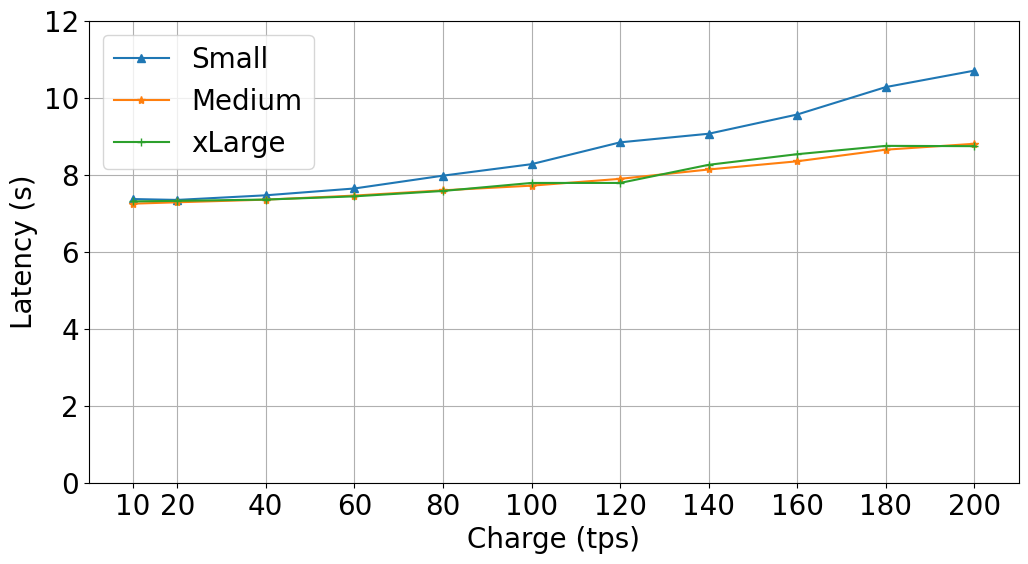

In [9]:
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Latência para Ethereum Provider por vCPU')
ax.set_xlabel('Charge (tps)')
ax.set_ylabel('Latency (s)')
ax.plot(p,latS,marker="^", label="Small")
ax.plot(p,latM,marker="*", label="Medium")
ax.plot(p,latL,marker="+", label="xLarge")
ax.set_ylim(0, 12)
ax.set_xlim(0, 210)
plt.xticks(p)
plt.grid()
plt.legend()
plt.legend()
plt.savefig('graph_latency_Eth.pdf')
plt.show()

In [10]:
custo = (0.02300, 0.0464, 0.1856)
tradeoffS = []
tradeoffM = []
tradeoffL = []
for i in range(0,11):
    tradeoffS.append(latS[i] * custo[0])
    tradeoffM.append(latM[i] * custo[1])
    tradeoffL.append(latL[i] * custo[2])
print([ float("%.02f" % x) for x in tradeoffS])
print([ float("%.02f" % x) for x in tradeoffM])
print([ float("%.02f" % x) for x in tradeoffL])

[0.17, 0.17, 0.17, 0.18, 0.18, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25]
[0.34, 0.34, 0.34, 0.35, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41]
[1.36, 1.36, 1.36, 1.38, 1.41, 1.45, 1.45, 1.53, 1.58, 1.62, 1.62]


In [16]:
Small = (0.112, 0.112, 0.128, 0.153, 0.183, 0.202, 0.222, 0.239, 0.249, 0.256, 0.261)
Medium = (0.226, 0.226, 0.235, 0.269, 0.299, 0.341, 0.368, 0.387, 0.415, 0.430, 0.454)
xLarge = (0.901, 0.903, 0.968, 1.036, 1.153, 1.286, 1.441, 1.558, 1.647, 1.700, 1.806)

In [17]:
obj = {'Small': [0.112, 0.112, 0.128, 0.153, 0.183, 0.202, 0.222, 0.239, 0.249, 0.256, 0.261],
       'Medium':[0.226, 0.226, 0.235, 0.269, 0.299, 0.341, 0.368, 0.387, 0.415, 0.430, 0.454],
       'xLarge':[0.901, 0.903, 0.968, 1.036, 1.153, 1.286, 1.441, 1.558, 1.647, 1.700, 1.806]}
df = pd.DataFrame(data=obj)
df_max_scaled = df.copy() 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df.abs().max().max() 
display(df_max_scaled)

,Small,Medium,xLarge
0,0.062016,0.125138,0.498893
1,0.062016,0.125138,0.500000
2,0.070875,0.130122,0.535991
3,0.084718,0.148948,0.573643
4,0.101329,0.165559,0.638427
5,0.111849,0.188815,0.712071
6,0.122924,0.203765,0.797896
7,0.132337,0.214286,0.862680
8,0.137874,0.229790,0.911960
9,0.141750,0.238095,0.941307


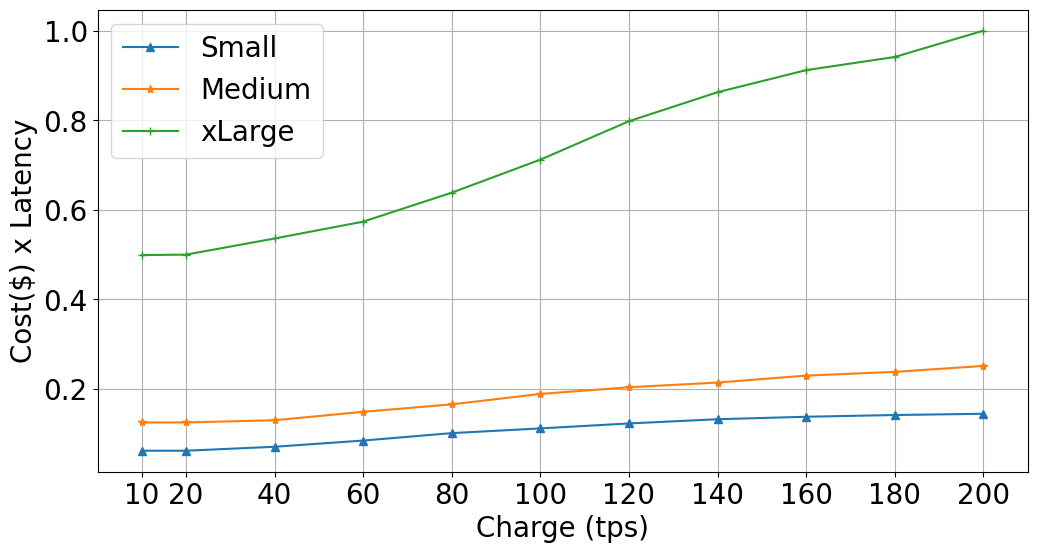

In [18]:
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
#ax.set_title('Latência para Ethereum Provider por vCPU')
ax.set_xlabel('Charge (tps)')
ax.set_ylabel('Cost($) x Latency')
ax.plot(p,df_max_scaled['Small'],marker="^", label="Small")
ax.plot(p,df_max_scaled['Medium'],marker="*", label="Medium")
ax.plot(p,df_max_scaled['xLarge'],marker="+", label="xLarge")
ax.set_xlim(0, 210)
plt.xticks(p)
plt.grid()
plt.legend()
plt.legend()
plt.savefig('graph_costs_eth.pdf')
plt.show()

In [16]:
monitorS = pd.read_csv('TxMonitorValSmall.csv')
monitorM = pd.read_csv('TxMonitorValMedium.csv')
monitorL = pd.read_csv('TxMonitorValxLarge.csv')

In [17]:
def filtro_cpu_mem(vm):
  vm__cpu_mean = []
  vm__cpu_erro = []
  vm_cpu_filtro = []
  cpu = []
  for i in range(1,12):
      l_round_x = vm.query('round==%s'%i)
      cpu = l_round_x['cpu(%)']
      vm_cpu_filtro.append(cpu.tolist())
      cpu_mean = np.mean(cpu)
      cpu_erro = st.t.interval(0.05, len(cpu)-1, loc=np.mean(cpu), scale=st.sem(cpu))
      vm__cpu_mean.append(cpu_mean)
      vm__cpu_erro.append(cpu_erro[1] - cpu_erro[0])
  return vm_cpu_filtro

In [18]:
vmS_cpu = filtro_cpu_mem(monitorS)
vmM_cpu = filtro_cpu_mem(monitorM)
vmL_cpu = filtro_cpu_mem(monitorL)

In [19]:
def grafico(filtro,txt1,txt2,y,ytick,type=0,outfile=0):
    x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    plt.rcParams.update({'font.size':20})
    fig,ax = plt.subplots(figsize =(12,6))
    ax.set_xlabel(txt2)
    ax.set_ylabel(txt1)
    if(type==1): # net MBytes/seg.
      ax.set_ylim(0, 10)
      ax.set_yticks(range(0, 11, 2))
    else:
      ax.set_ylim(-3, 110)    
      ax.set_yticks(range(0, 110, 20))
    ax.boxplot(filtro, widths=10 ,labels=x, positions=p)
    plt.yticks(ytick)
    plt.grid()
    return plt

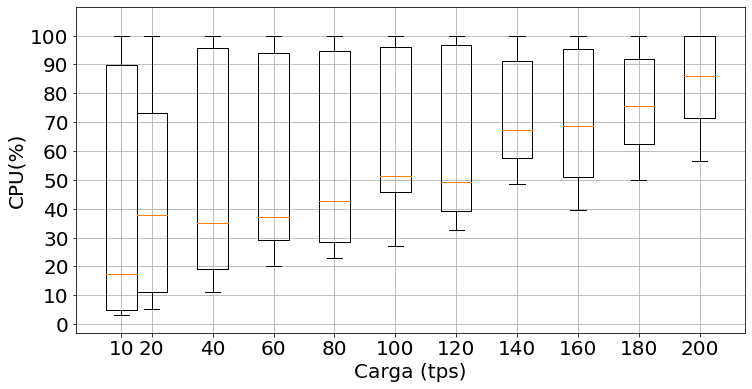

In [20]:
plt1_cpu = grafico(vmS_cpu,'CPU(%)','Charge (tps)',vazS,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Ethereum_CPU_Small.pdf')

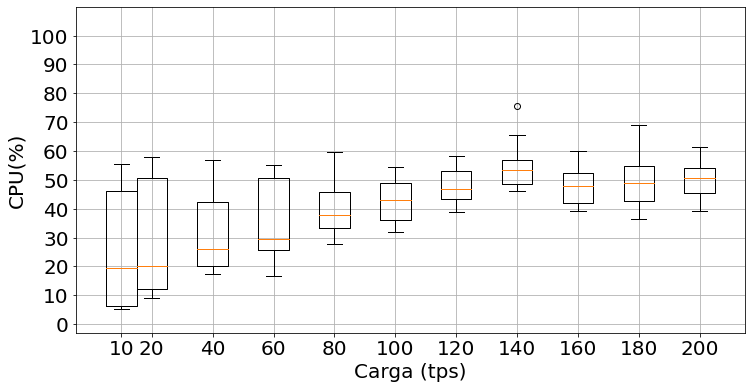

In [21]:
plt1_cpu = grafico(vmM_cpu,'CPU(%)','Charge (tps)',vazM,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Ethereum_CPU_Medium.pdf')

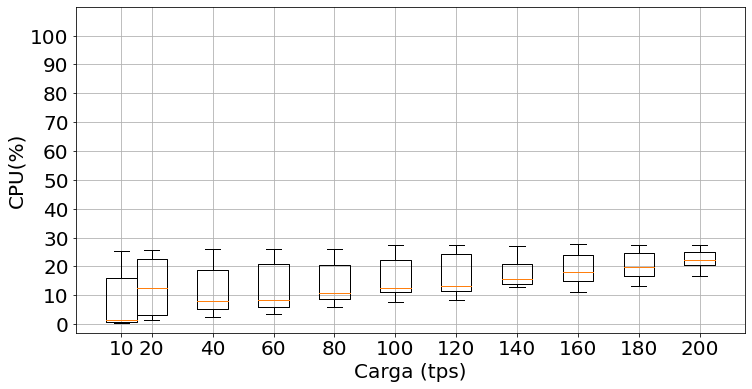

In [22]:
plt1_cpu = grafico(vmL_cpu,'CPU(%)','Charge (tps)',vazL,[0,10, 20,30,40,50, 60,70, 80,90, 100])
plt1_cpu.savefig('graphic_Ethereum_CPU_Large.pdf')

In [23]:
def busca(alist, item):
    pos = 0
    found = False

    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else:
            pos = pos+1

    return found

In [24]:
from random import randint
megasena = []
for x in range(6):
    valor = randint(1,60)
    if busca(megasena,valor):
       valor = randint(1,60)
    megasena.append(valor)
megasena.sort()
print([ x for x in megasena])

[5, 7, 32, 46, 53, 59]
